# **Intelligence Artificielle - TP initiation**

<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

Nous allons travailler sur des données disponibles publiquement en ligne pour explorer l'apprentissage automatique (machine learning). 
Les données correspondent à des mesures sur des images cytologiques obtenues à partir d'une aspiration avec une aiguille fine à partir de masses détectées dans le sein de patientes. La but est donc de prédire si ces masses sont bénignes ou malignes (ie cancers du sein). 

Exemple d'images utilisées : 

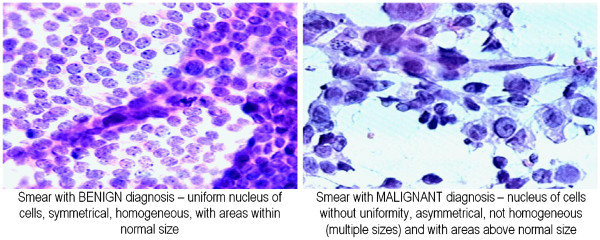

Un système automatisé d'analyse d'images a permis d'extraire des paramêtres numériques et ce sont ceux ci que nous allons utilisés. 

Vous aurez au cours de ce TP 3 questions (cadre orange) pour lesquelles les réponses sont attendues sur moodle (Quiz intro IA) et qui serviront dans le cadre de votre évaluation pour cet UE3 (contrôle continue). 


**Plan du TP :**

**I. Load Data**  
**II. Explore Data**  
**III. Decision Tree**  
**IV. Random Forest**

**Conclusion**



## I - Load Data

Nous allons tout d'abord charger les données sous forme d'un tableau (les titres des colonnes sont dans un fichier séparé). 

In [1]:
# 1- Load necessary tools
library(ggplot2)
library(tidyr)
library(caret)
library(corrplot)
library(dplyr)
library(rpart)
library(rpart.plot)

Loading required package: lattice

Warning message:
“Failed to locate timezone database”
corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# 2- Load data (csv and txt files) in dataframe called breastCancerData and breastCancerDataColNames with read.table()
databreast <- read.table("../pass_minrs_ue3_intro_ia/DataBreastCancerWisconsin.csv", header=F, sep=",")
namesbreast <- read.table("../pass_minrs_ue3_intro_ia/NamesBreastCancerWisconsin.txt", header=F)

In [6]:
# 3- Visualiser les premières lignes de vos données
str(databreast)
str(namesbreast)
head(databreast)
head(namesbreast)

'data.frame':	569 obs. of  32 variables:
 $ V1 : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ V2 : chr  "M" "M" "M" "M" ...
 $ V3 : num  18 20.6 19.7 11.4 20.3 ...
 $ V4 : num  10.4 17.8 21.2 20.4 14.3 ...
 $ V5 : num  122.8 132.9 130 77.6 135.1 ...
 $ V6 : num  1001 1326 1203 386 1297 ...
 $ V7 : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ V8 : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ V9 : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ V10: num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ V11: num  0.242 0.181 0.207 0.26 0.181 ...
 $ V12: num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ V13: num  1.095 0.543 0.746 0.496 0.757 ...
 $ V14: num  0.905 0.734 0.787 1.156 0.781 ...
 $ V15: num  8.59 3.4 4.58 3.44 5.44 ...
 $ V16: num  153.4 74.1 94 27.2 94.4 ...
 $ V17: num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
 $ V18: num  0.049 0.0131 0.0401 0.0746 0.0246 ...
 $ V19: num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
 $ V20: num  0.0159 0.01

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


,V1
,<chr>
1,ID
2,Diagnosis
3,Radius.Mean
4,Texture.Mean
5,Perimeter.Mean
6,Area.Mean


In [7]:
# 4- Visualiser les noms de colonnes
names(databreast)<-namesbreast[,1]
head(databreast)

,ID,Diagnosis,Radius.Mean,Texture.Mean,Perimeter.Mean,Area.Mean,Smoothness.Mean,Compactness.Mean,Concavity.Mean,Concave.Points.Mean,⋯,Radius.Worst,Texture.Worst,Perimeter.Worst,Area.Worst,Smoothness.Worst,Compactness.Worst,Concavity.Worst,Concave.Points.Worst,Symmetry.Worst,Fractal.Dimension.Worst
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [8]:
# 5- Ajouter le nom des colonnes à votre dataframe breastCancerData
str(databreast)

'data.frame':	569 obs. of  32 variables:
 $ ID                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ Diagnosis              : chr  "M" "M" "M" "M" ...
 $ Radius.Mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ Texture.Mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ Perimeter.Mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ Area.Mean              : num  1001 1326 1203 386 1297 ...
 $ Smoothness.Mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ Compactness.Mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ Concavity.Mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ Concave.Points.Mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ Symmetry.Mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ Fractal.Dimension.Mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ Radius.SE              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ Texture.SE             : num  0.905 0.734 0.787 1

In [ ]:
# 6- Quelles sont les dimensions de votre dataframe breastCancerData ?


In [9]:
# 7- Combien avez vous de patientes avec un diagnostic "B" (benin) ?
table(databreast$Diagnosis)


  B   M 
357 212 

In [ ]:
# 8- Combien avez vous de patientes avec un diagnostic de tumeur maligne "M" ?


<div class="alert alert-warning"> 
    Ceci doit être la réponse au 1er quizz sur le moodle (nombre de patientes avec une tumeur maligne)
</div>

In [10]:
# 9- Faites du diagnostic un facteur
databreast$Diagnosis <- as.factor(databreast$Diagnosis)

In [11]:
# 10- Mettez le numéro d'identification des patientes en rownames et retirez la colonne correspondante du tableau
row.names(databreast) <- databreast$ID
databreast <- databreast[,-1]
str(databreast)
head(databreast)

'data.frame':	569 obs. of  31 variables:
 $ Diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ Radius.Mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ Texture.Mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ Perimeter.Mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ Area.Mean              : num  1001 1326 1203 386 1297 ...
 $ Smoothness.Mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ Compactness.Mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ Concavity.Mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ Concave.Points.Mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ Symmetry.Mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ Fractal.Dimension.Mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ Radius.SE              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ Texture.SE             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ Perimeter.SE           : num  8.59 3.4 4.58 3.44 5.44 ...
 $ Area.SE    

,Diagnosis,Radius.Mean,Texture.Mean,Perimeter.Mean,Area.Mean,Smoothness.Mean,Compactness.Mean,Concavity.Mean,Concave.Points.Mean,Symmetry.Mean,⋯,Radius.Worst,Texture.Worst,Perimeter.Worst,Area.Worst,Smoothness.Worst,Compactness.Worst,Concavity.Worst,Concave.Points.Worst,Symmetry.Worst,Fractal.Dimension.Worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [13]:
# 11- Visualiser les premières lignes de vos données
names(databreast)

[1] "Diagnosis"               "Radius.Mean"            
 [3] "Texture.Mean"            "Perimeter.Mean"         
 [5] "Area.Mean"               "Smoothness.Mean"        
 [7] "Compactness.Mean"        "Concavity.Mean"         
 [9] "Concave.Points.Mean"     "Symmetry.Mean"          
[11] "Fractal.Dimension.Mean"  "Radius.SE"              
[13] "Texture.SE"              "Perimeter.SE"           
[15] "Area.SE"                 "Smoothness.SE"          
[17] "Compactness.SE"          "Concavity.SE"           
[19] "Concave.Points.SE"       "Symmetry.SE"            
[21] "Fractal.Dimension.SE"    "Radius.Worst"           
[23] "Texture.Worst"           "Perimeter.Worst"        
[25] "Area.Worst"              "Smoothness.Worst"       
[27] "Compactness.Worst"       "Concavity.Worst"        
[29] "Concave.Points.Worst"    "Symmetry.Worst"         
[31] "Fractal.Dimension.Worst"

# II - Explorer les données

Nous allons maintenant regarder les données d'un peu plus près pour nous familiariser avec elles et potentiellement décider lesquelles sont les plus pertinentes. 

In [ ]:
# 12- Explorer les données avec summary()


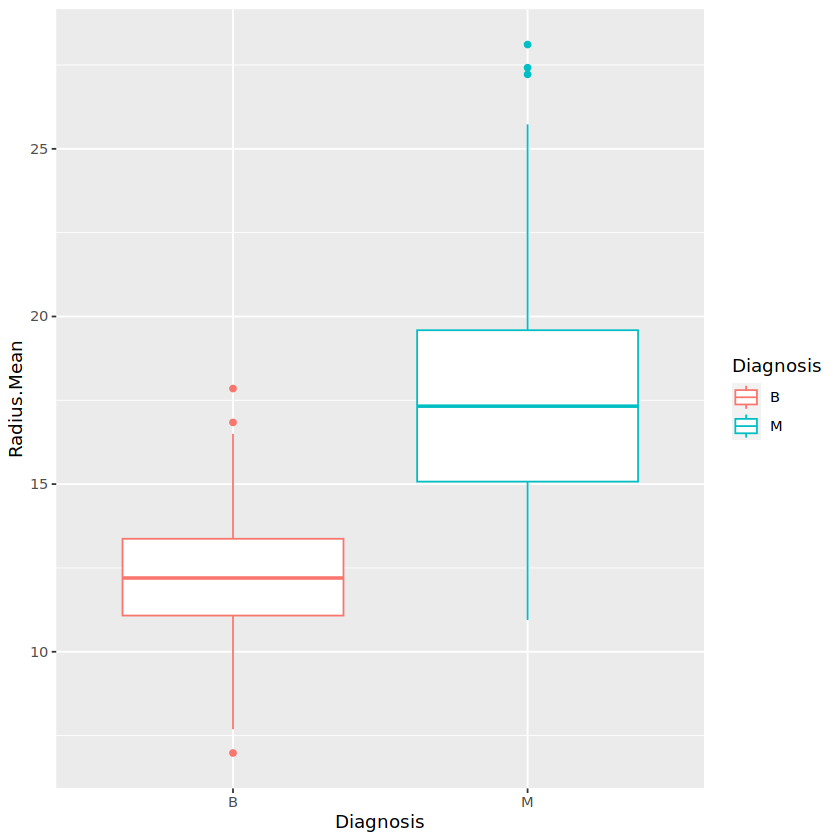

In [14]:
# 13- Faire un boxplot avec le paramêtre Radius.Mean pour comparer les B et les M 
#(remplacer les XXX et co par les éléments nécessaires)
ggplot(databreast, aes(Diagnosis, Radius.Mean, color = Diagnosis)) + geom_boxplot()

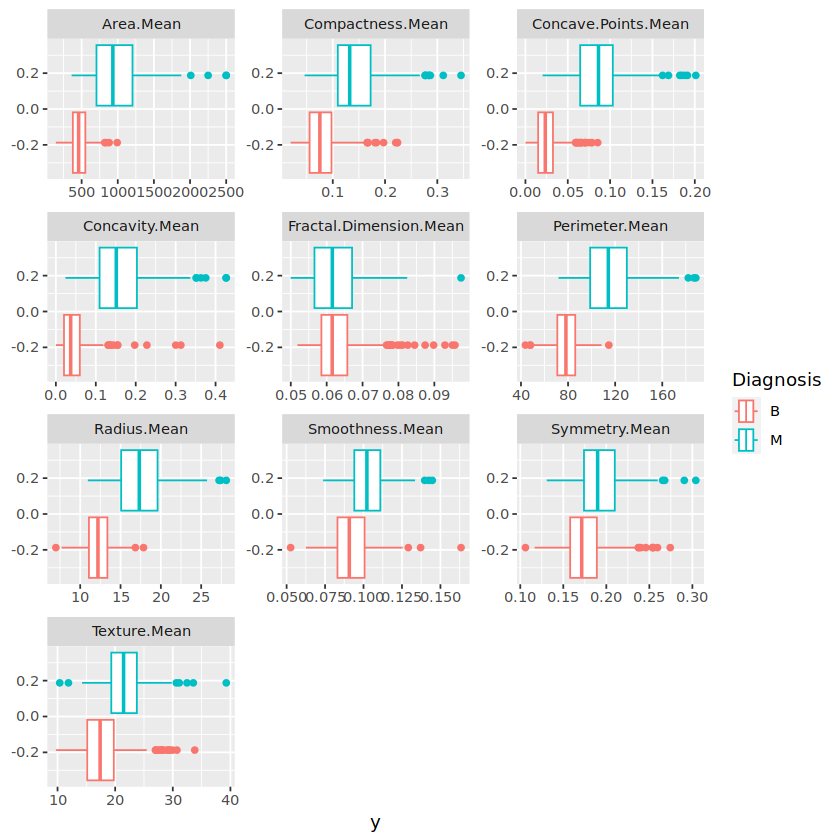

In [15]:
# 14- Visualiser plusieurs boxplot d'un coup (les colonnes avec des moyennes "mean")
gather(databreast, x, y, 2:11) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [ ]:
# 15- Visualiser plusieurs boxplot d'un coup (les colonnes avec des ecarts types "SE")


In [17]:
# 16- Visualiser plusieurs boxplot d'un coup (les colonnes avec pires valeurs "Worst")

breastCancerData <- databreast

In [18]:
# 17- Center & scale data
ppv <- preProcess(breastCancerData, method = c("center", "scale"))
breastCancerData_tr <- predict(ppv, breastCancerData)

In [20]:
# 18- Summarize first 5 columns of the original data using summary()
summary(breastCancerData[,1:5])

 Diagnosis  Radius.Mean      Texture.Mean   Perimeter.Mean     Area.Mean     
 B:357     Min.   : 6.981   Min.   : 9.71   Min.   : 43.79   Min.   : 143.5  
 M:212     1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17   1st Qu.: 420.3  
           Median :13.370   Median :18.84   Median : 86.24   Median : 551.1  
           Mean   :14.127   Mean   :19.29   Mean   : 91.97   Mean   : 654.9  
           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10   3rd Qu.: 782.7  
           Max.   :28.110   Max.   :39.28   Max.   :188.50   Max.   :2501.0  

In [21]:
# 19- Summarize first 5 columns of the re-centered and scaled data
summary(breastCancerData_tr[,1:5])

 Diagnosis  Radius.Mean       Texture.Mean     Perimeter.Mean   
 B:357     Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 M:212     1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
           Median :-0.2149   Median :-0.1045   Median :-0.2358  
           Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
           3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
           Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  
   Area.Mean      
 Min.   :-1.4532  
 1st Qu.:-0.6666  
 Median :-0.2949  
 Mean   : 0.0000  
 3rd Qu.: 0.3632  
 Max.   : 5.2459  

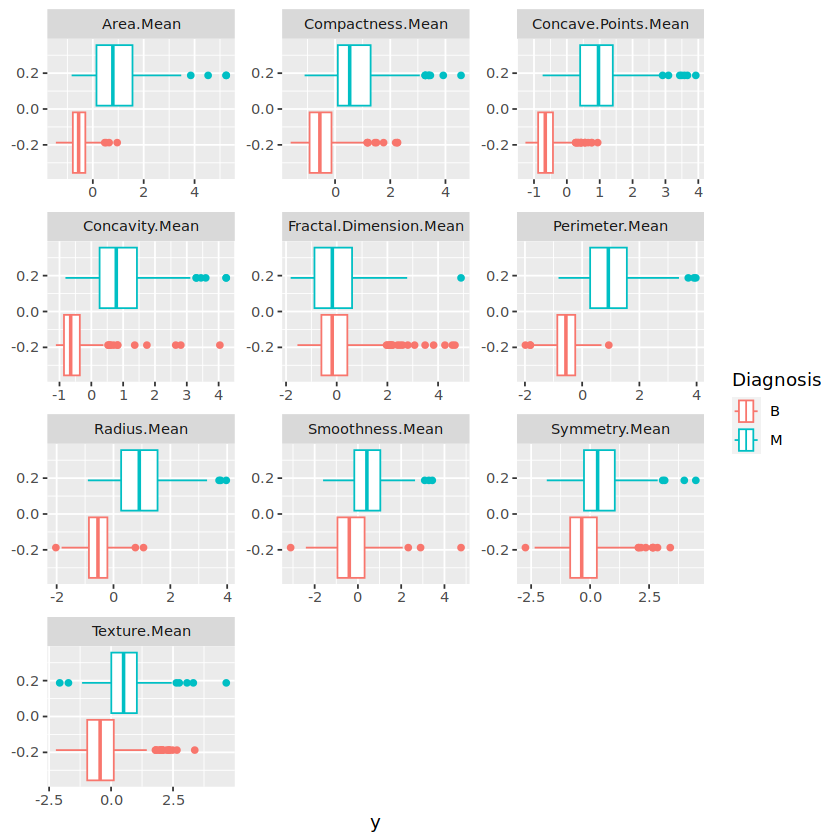

In [22]:
# 20- Visualiser à nouveau plusieurs boxplot d'un coup à partir des données centrées
gather(breastCancerData_tr, x, y, 2:11) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [29]:
?corrplot

corrplot {corrplot},R Documentation
corr,"The correlation matrix to visualize, must be square if order is not 'original'. For general matrix, please using is.corr = FALSE to convert."
method,"Character, the visualization method of correlation matrix to be used. Currently, it supports seven methods, named 'circle' (default), 'square', 'ellipse', 'number', 'pie', 'shade' and 'color'. See examples for details. The areas of circles or squares show the absolute value of corresponding correlation coefficients. Method 'pie' and 'shade' came from Michael Friendly's job (with some adjustment about the shade added on), and 'ellipse' came from D.J. Murdoch and E.D. Chow's job, see in section References."
type,"Character, 'full' (default), 'upper' or 'lower', display full matrix, lower triangular or upper triangular matrix."
col,"Vector, the colors of glyphs. They are distributed uniformly in col.lim interval. If is.corr is TRUE, the default value will be COL2('RdBu', 200). If is.corr is FALSE and corr is a non-negative or non-positive matrix, the default value will be COL1('YlOrBr', 200); otherwise (elements are partly positive and partly negative), the default value will be COL2('RdBu', 200)."
col.lim,"The limits (x1, x2) interval for assigning color by col. If NULL, col.lim will be c(-1, 1) when is.corr is TRUE, col.lim will be c(min(corr), max(corr)) when is.corr is FALSE NOTICE: if you set col.lim when is.corr is TRUE, the assigning colors are still distributed uniformly in [-1, 1], it only affect the display on color-legend."
bg,The background color.
title,"Character, title of the graph."
is.corr,"Logical, whether the input matrix is a correlation matrix or not. We can visualize the non-correlation matrix by setting is.corr = FALSE."
add,"Logical, if TRUE, the graph is added to an existing plot, otherwise a new plot will be created."
diag,"Logical, whether display the correlation coefficients on the principal diagonal."


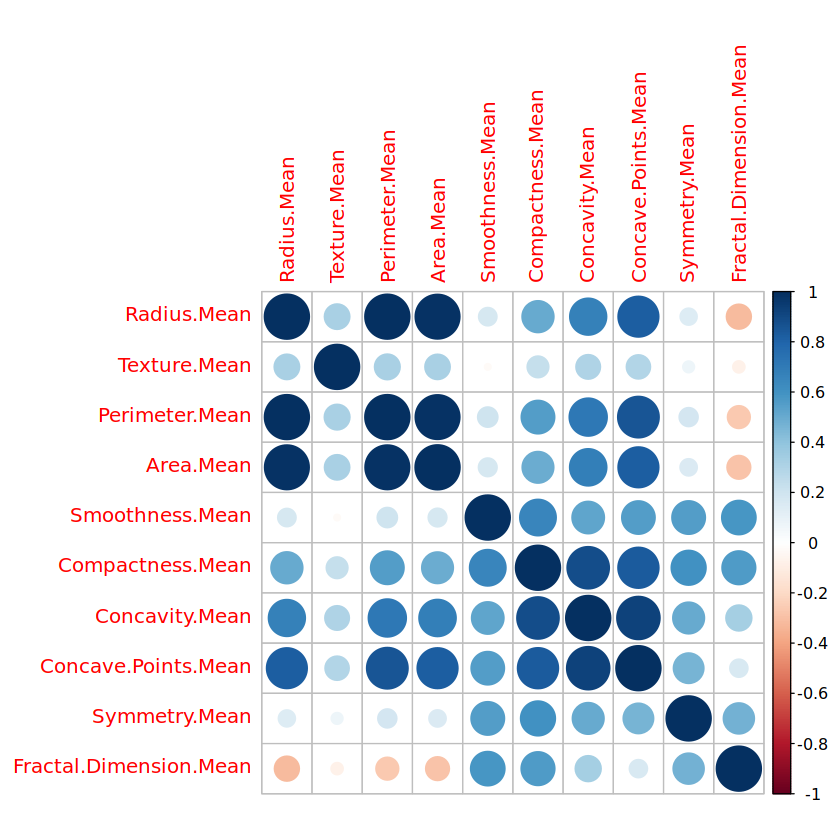

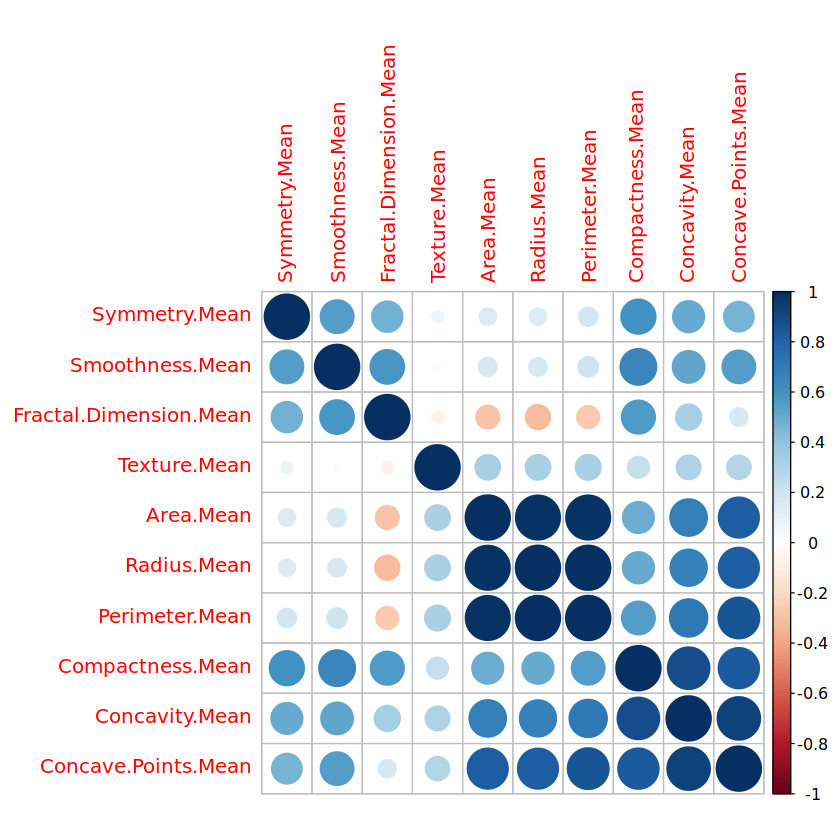

In [30]:
# 21- vérifier si les variables sont fortement corrélées entre elles
# calculate correlation matrix avec cor() 

# calculate correlation matrix avec corrplot() 

corrplot(cor(breastCancerData [,2:11]))

# calculate correlation matrix avec corrplot() et l'option order hclust
corrplot(cor(breastCancerData [,2:11]), order = "hclust")


In [31]:
# 22- Faire des tests statistiques pour voir les paramêtres les plus prometteurs
# exemple pour la colonne Radius.Mean
t.test(Radius.Mean ~ Diagnosis, data=breastCancerData)$p.value
# stocker les p-val pour chacun des 30 paramêtres dans une variable nommée ttests (utiliser la fonction lapply)


[1] 1.684459e-64

# III - Decision Tree

In [32]:
# 23- split into training and test subsets
set.seed(1000)
ind <- sample(2, nrow(breastCancerData), replace=TRUE, prob=c(0.7, 0.3))
breastCancerData.train <- breastCancerData[ind==1,]
breastCancerData.test <- breastCancerData[ind==2,]

Warning message:
“attributes are not identical across measure variables; they will be dropped”


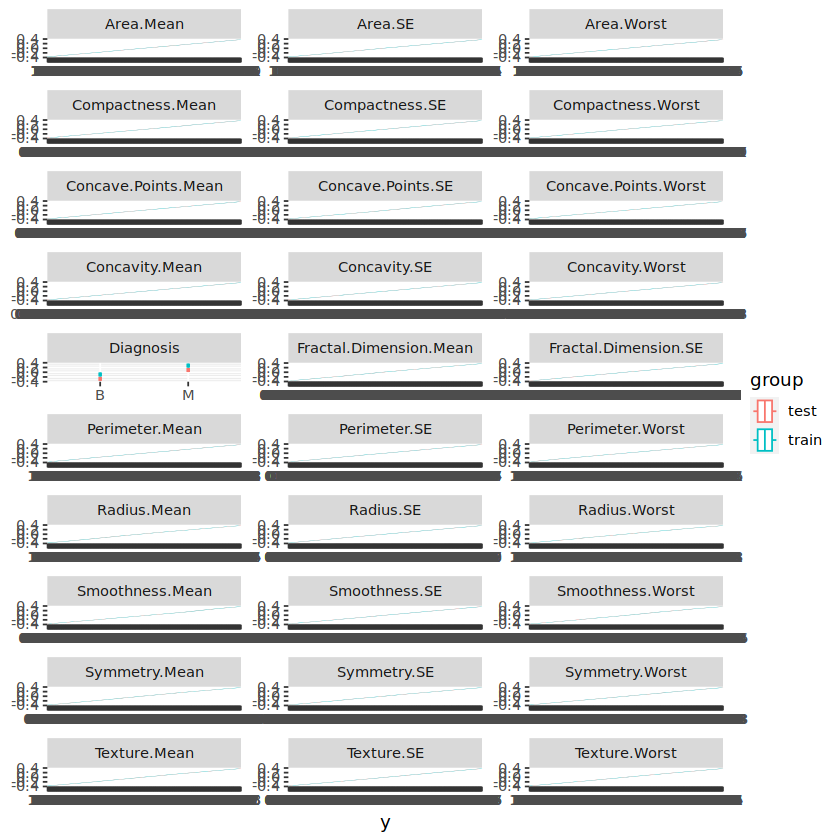

In [34]:
# 24- vérifier que les 2 sets sont comparables
bind_rows(data.frame(group = "train", breastCancerData.train),
      data.frame(group = "test", breastCancerData.test)) %>%
  gather(x, y, 2:31) %>%
  ggplot(aes(x = y, color = group)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

           CP nsplit rel error    xerror       xstd
1  0.69594595      0 1.0000000 1.0000000 0.06469979
2  0.04054054      1 0.3040541 0.3986486 0.04780204
3  0.01013514      3 0.2229730 0.3243243 0.04382897
4  0.00000000      5 0.2027027 0.3040541 0.04262349
5 -1.00000000      7 0.2027027 0.3040541 0.04262349


   
      B   M
  B 228  17
  M  13 131

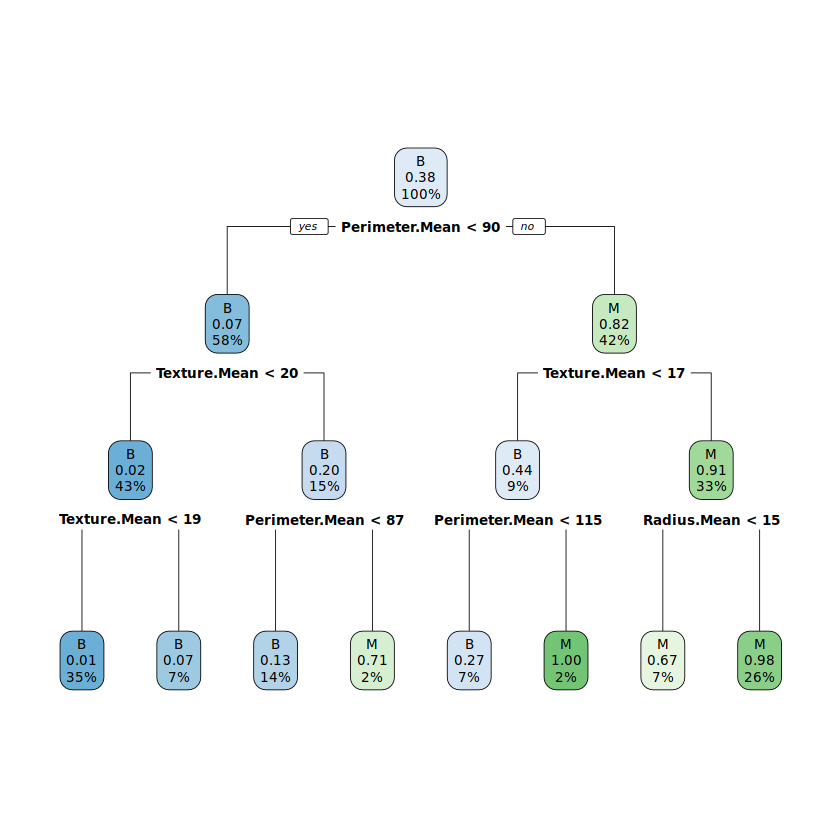

In [35]:
# 25- Construire un modèle avec 3 paramètres
myFormula <- Diagnosis ~ Radius.Mean + Texture.Mean + Perimeter.Mean

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively (the larger its value, the more probable to apply pruning to the tree)

print(breastCancerData.model$cptable)
rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)


<div class="alert alert-warning"> 
    2ème quizz sur le moodle : combien y a-t-il d'erreurs (faux positifs + faux négatifs) avec ce modèle sur le dataset d'entrainement (training set) ? 
</div>

In [38]:
breastCancerData.model

n= 389 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 389 148 B (0.619537275 0.380462725)  
   2) Perimeter.Mean< 90.115 226  15 B (0.933628319 0.066371681)  
     4) Texture.Mean< 20.235 166   3 B (0.981927711 0.018072289)  
       8) Texture.Mean< 18.635 138   1 B (0.992753623 0.007246377) *
       9) Texture.Mean>=18.635 28   2 B (0.928571429 0.071428571) *
     5) Texture.Mean>=20.235 60  12 B (0.800000000 0.200000000)  
      10) Perimeter.Mean< 87.255 53   7 B (0.867924528 0.132075472) *
      11) Perimeter.Mean>=87.255 7   2 M (0.285714286 0.714285714) *
   3) Perimeter.Mean>=90.115 163  30 M (0.184049080 0.815950920)  
     6) Texture.Mean< 17 34  15 B (0.558823529 0.441176471)  
      12) Perimeter.Mean< 114.8 26   7 B (0.730769231 0.269230769) *
      13) Perimeter.Mean>=114.8 8   0 M (0.000000000 1.000000000) *
     7) Texture.Mean>=17 129  11 M (0.085271318 0.914728682)  
      14) Radius.Mean< 15.02 27   9 M (0.333333333 0.666666667) *
     

5 
5

   
      B   M
  B 228  17
  M  13 131

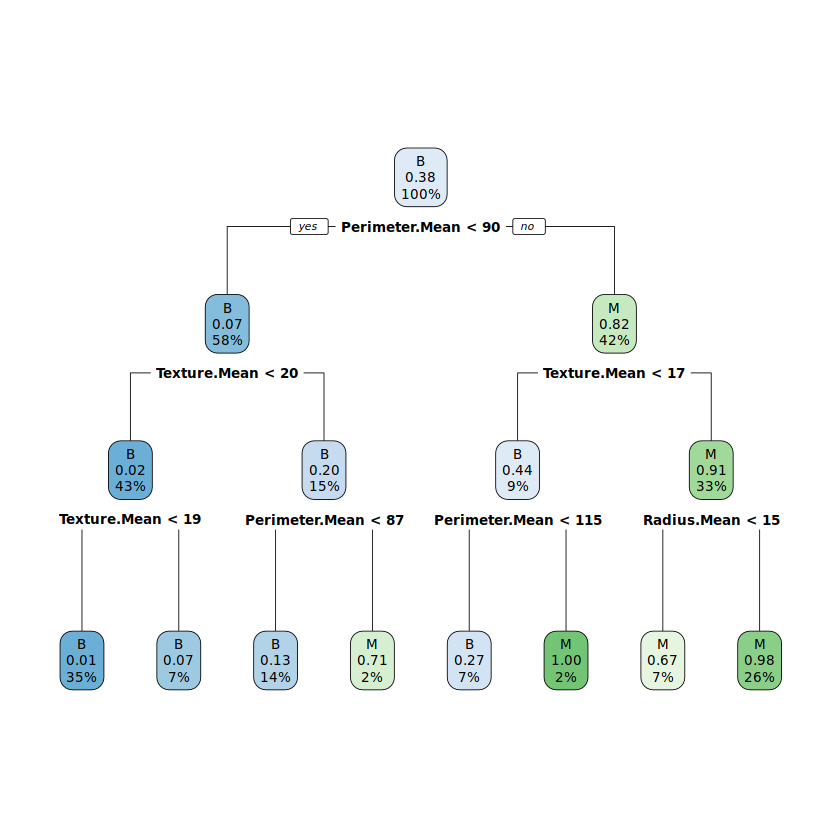

In [39]:
# 26- simplifier ce modèle en modifiant le cp (prendre le cp otimal = min with xerror)
opt <- which.min(breastCancerData.model$cptable[, "CP"])
opt
cp <- breastCancerData.model$cptable[opt, "CP"]
# prune tree
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
# plot tree
rpart.plot(breastCancerData.pruned.model)

table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)

                 
BreastCancer_pred   B   M
                B 106   7
                M  10  57

                 
BreastCancer_pred   B   M
                B 106   7
                M  10  57

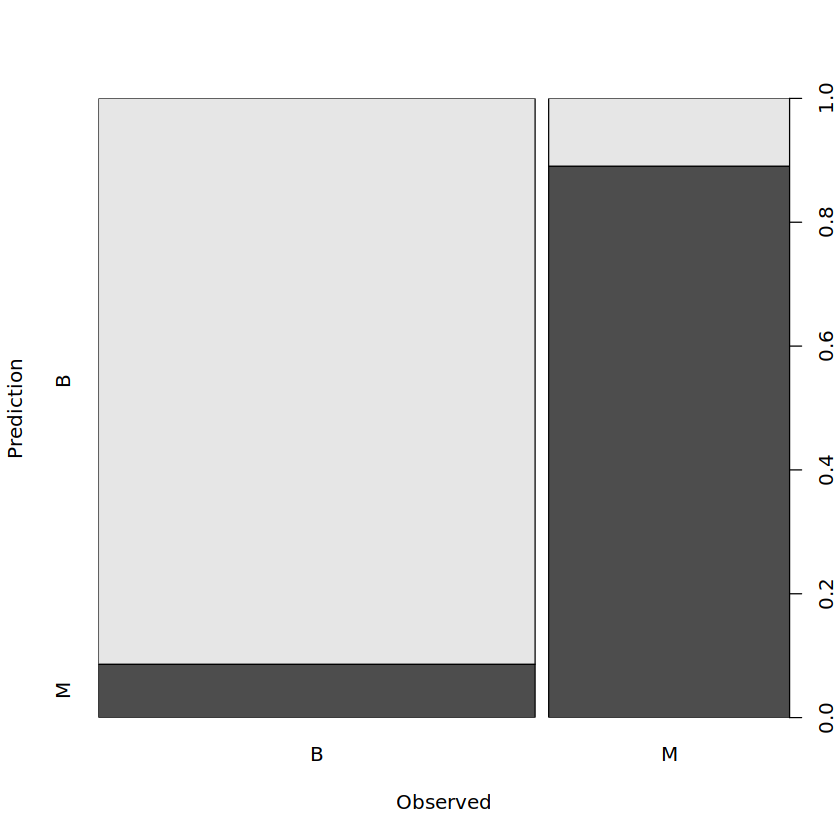

In [40]:
# 27- Test the model (initial and pruned) on test set
## make prediction
BreastCancer_pred <- predict(breastCancerData.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")

In [ ]:
# 28- Construire un nouveau modèle avec 3 mêmes paramètres (Radius.Mean, Texture.Mean, Perimeter.Mean) mais avec minsplit=15, minbucket=2 et maxdepth=5

#simplifier ce modèle

# Le tester sur le set test 


In [ ]:
# 29- Recommencer avec minsplit=5, minbucket=1 et maxdepth=2

#simplifier ce modèle

# Le tester sur le set test 

In [ ]:
# 30- Construire un modèle avec 3 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3

#simplifier ce modèle

# Le tester sur le set test 


In [ ]:
# 31- Construire un modèle avec 4 autres paramètres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst)
# with minsplit = 10, minbucket = 1, maxdepth = 3

#simplifier ce modèle

# Le tester sur le set test 


<div class="alert alert-warning"> 
    3ème quizz sur le moodle : est-ce que le modèle avec les 3 paramètres (Radius.Mean, Concavity.Mean et Perimeter.Worst) est plus performant (ie donne moins d'erreurs) sur le set test que le modèle avec 4 paramêtres (Radius.Mean, Concavity.Mean, Perimeter.Worst, Compactness.Worst) ? 
</div>

## IV - Random Forest

<div class="alert alert-block alert-danger">
    <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 1 minute) de calcul. Patience patience ...
</div>

In [41]:
# 32- Create a random forest model on the training dataset

model_rf <- caret::train(Diagnosis ~ .,
                         data = breastCancerData,
                         method = "rf",
                         preProcess = c("scale", "center"),
                         trControl = trainControl(method = "repeatedcv", 
                                                  number = 5, 
                                                  repeats = 3, 
                                                  verboseIter = FALSE))

model_rf
model_rf$finalModel$confusion

Random Forest 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

Pre-processing: scaled (30), centered (30) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 456, 455, 455, 456, 454, 456, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9578418  0.9092148
  16    0.9566877  0.9072971
  30    0.9549282  0.9032496

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

,B,M,class.error
B,349,8,0.02240896
M,13,199,0.06132075


Radius.Worst     Concave.Points.Mean         Perimeter.Worst 
              21.708083               20.598083               20.257145 
   Concave.Points.Worst              Area.Worst               Area.Mean 
              20.167743               20.123331               16.935078 
                Area.SE             Radius.Mean          Concavity.Mean 
              14.739260               14.659344               14.642271 
         Perimeter.Mean         Concavity.Worst            Perimeter.SE 
              13.873307               12.024093                8.204444 
      Compactness.Worst            Texture.Mean        Compactness.Mean 
               7.577229                6.246391                6.242221 
              Radius.SE           Texture.Worst        Smoothness.Worst 
               6.147321                4.909429                4.370618 
           Concavity.SE          Symmetry.Worst       Concave.Points.SE 
               4.306006                4.036789                3.503018 
Fractal.Dimension.Worst         Smoothness.Mean          Compactness.SE 
               3.214237                3.068984                2.701138 
 Fractal.Dimension.Mean    Fractal.Dimension.SE           Symmetry.Mean 
               2.170252                1.982518                1.829545 
             Texture.SE             Symmetry.SE           Smoothness.SE 
               1.774073                1.729663                1.727415

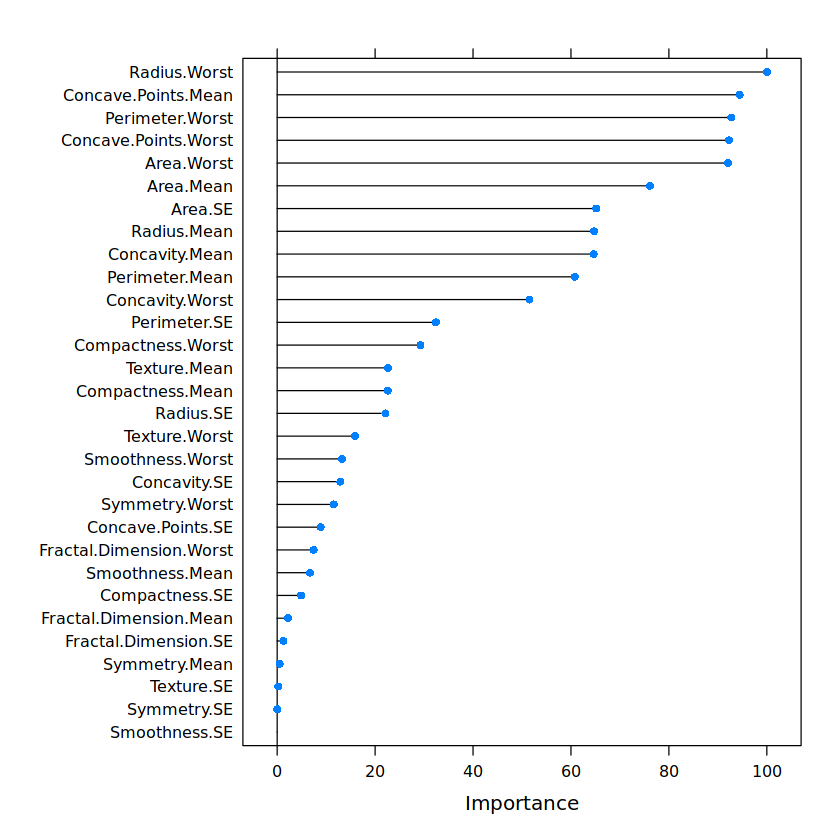

In [42]:
# 33- plot parameters importance
imp <- model_rf$finalModel$importance
imp[order(imp, decreasing = TRUE), ]

# estimate variable importance
importance <- varImp(model_rf, scale = TRUE)
plot(importance)

In [44]:
?confusionMatrix

confusionMatrix             package:caret              R Documentation

_C_r_e_a_t_e _a _c_o_n_f_u_s_i_o_n _m_a_t_r_i_x

_D_e_s_c_r_i_p_t_i_o_n:

     Calculates a cross-tabulation of observed and predicted classes
     with associated statistics.

_U_s_a_g_e:

     confusionMatrix(data, ...)
     
     ## Default S3 method:
     confusionMatrix(
       data,
       reference,
       positive = NULL,
       dnn = c("Prediction", "Reference"),
       prevalence = NULL,
       mode = "sens_spec",
       ...
     )
     
     ## S3 method for class 'matrix'
     confusionMatrix(
       data,
       positive = NULL,
       prevalence = NULL,
       mode = "sens_spec",
       ...
     )
     
     ## S3 method for class 'table'
     confusionMatrix(
       data,
       positive = NULL,
       prevalence = NULL,
       mode = "sens_spec",
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

    data: a factor of predicted classes (for the default method) or an
          object of class ‘table’.

     ...: options to be passed to ‘table’. NOTE: do not include ‘dnn’
          here

reference: a factor of classes to be used as the true results

positive: an optional character string for the factor level that
          corresponds to a "positive" result (if that makes sense for
          your data). If there are only two factor levels, the first
          level will be used as the "positive" result. When ‘mode =
          "prec_recall"’, ‘positive’ is the same value used for
          ‘relevant’ for functions ‘precision’, ‘recall’, and
          ‘F_meas.table’.

     dnn: a character vector of dimnames for the table

prevalence: a numeric value or matrix for the rate of the "positive"
          class of the data. When ‘data’ has two levels, ‘prevalence’
          should be a single numeric value. Otherwise, it should be a
          vector of numeric values with elements for each class. The
          vector should have names corresponding to the classes.

    mode: a single character string either "sens_spec", "prec_recall",
          or "everything"

_D_e_t_a_i_l_s:

     The functions requires that the factors have exactly the same
     levels.

     For two class problems, the sensitivity, specificity, positive
     predictive value and negative predictive value is calculated using
     the ‘positive’ argument. Also, the prevalence of the "event" is
     computed from the data (unless passed in as an argument), the
     detection rate (the rate of true events also predicted to be
     events) and the detection prevalence (the prevalence of predicted
     events).

     Suppose a 2x2 table with notation

                  Reference           
       Predicted    Event    No Event 
           Event      A         B     
        No Event      C         D     
      
     The formulas used here are:

                            Sensitivity = A/(A+C)                       
     
                            Specificity =D/(B+D)                        
     
                        Prevalence = (A+C)/(A+B+C+D)                    
     
     PPV = (sensitivity *
     prevalence)/((sensitivity*prevalence) + ((1-specificity)*(1-prevalence)))
     
     NPV = (specificity * (1-prevalence))/(((1-sensitivity)*prevalence) +
     ((specificity)*(1-prevalence)))
     
                        Detection Rate = A/(A+B+C+D)                    
     
                   Detection Prevalence = (A+B)/(A+B+C+D)               
     
               Balanced Accuracy =(sensitivity+specificity)/2           
     
                             Precision = A/(A+B)                        
     
                              Recall = A/(A+C)                          
     
        F1 =(1+beta^2)*precision*recall/((beta^2 * precision)+recall)   
     
     where ‘beta = 1’ for this function.

     See the references for discussions of the first five formulas.

     For more than two classes, these results are calculated com

In [45]:
# 34- predicting test data
confusionMatrix(predict(model_rf, breastCancerData.test), as.factor(breastCancerData.test$Diagnosis))

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 116   0
         M   0  64
                                     
               Accuracy : 1          
                 95% CI : (0.9797, 1)
    No Information Rate : 0.6444     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6444     
         Detection Rate : 0.6444     
   Detection Prevalence : 0.6444     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : B          
                                     

<div class="alert alert-warning"> 
    4ème (et dernier) quiz sur le moodle : est-ce que le modèle utilisant random forest est plus performant que les différents modèles de Decision tree sur le set test ? 
</div>

***
***
## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>